In [1]:
from Code.gram import GRAM_RTM

In [2]:
gram_dataset = GRAM_RTM(prefix="GRAM")

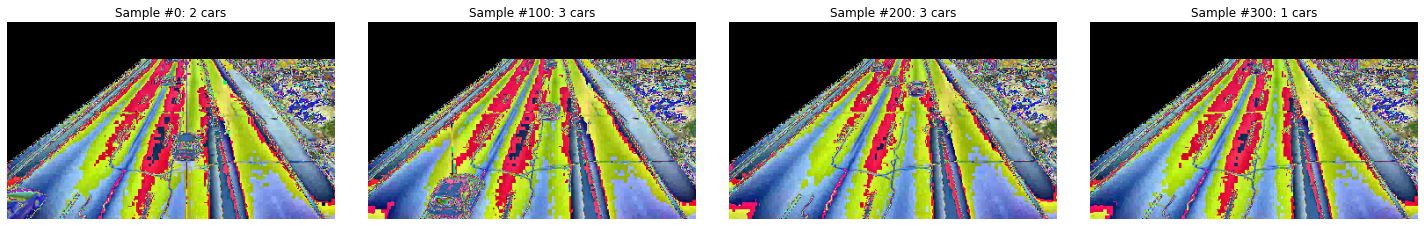

In [3]:
import matplotlib.pyplot as plt
from torchvision import transforms

plt.figure(figsize=(20,10))
for i in range(4):
    sample = gram_dataset[i * 100]
    ax = plt.subplot(1, 4, i + 1)
    plt.tight_layout()
    ax.set_title(f'Sample #{i * 100}: {sample[1]} cars')
    ax.axis('off')
    img = transforms.ToPILImage()(sample[0])
    ax.imshow(img)
plt.show()

In [4]:
from torch.utils.data import DataLoader
dataset = GRAM_RTM(prefix="GRAM")

In [5]:
from detectron2.config import get_cfg
from detectron2 import model_zoo as zoo
from detectron2.engine import DefaultPredictor

cfg = get_cfg()
cfg.merge_from_file(zoo.get_config_file("COCO-Detection/faster_rcnn_R_50_C4_3x.yaml"))
cfg.MODEL.WEIGHTS = zoo.get_checkpoint_url("COCO-Detection/faster_rcnn_R_50_C4_3x.yaml")
predictor = DefaultPredictor(cfg)
backbone = predictor.model.backbone

In [6]:
import torch

with torch.no_grad():
    for i in range(len(dataset)):
        print(f'\r{i}', end='')
        sample = gram_dataset[i][0].unsqueeze(0)
        act_map = backbone(sample.cuda())['res4']
        torch.save(act_map.detach().cpu(), f'GRAM/maps/map{i + 1:06}.pt')

7519